# **CS412 - Machine Learning - 2022 Summer**
## **Homework 1**
100 pts + 10pts(bonus section)


## **Goal**

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with Decision tree approach
*   Gain experience with the Scikit library

## **Dataset**
This dataset is taken from the following Kaggle link and simplified for the Homework 1: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv

**Download the data from Sucourse.**
You must use 20% of the data for validation and 20% for test: **Training: 60%, Validation: 20%, Test: 20%**

## **Task**
Build a decision tree classifier with the scikit library function calls to predict whether a data scientist candidate is going to look for a new job or will work for the company - **target column** is the target variable.

**You should check the documentation "cs412_hw1_desc" to understand the task wholly.**

## **Software: You may find the necessary function references here:**
http://scikit-learn.org/stable/supervised_learning.html

## **Submission:**
Fill this notebook and submit this document with a link to #your Colab notebook 
(make sure to include the link obtained from the #share link on top right)


## 0) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   You may upload the data to the section on your left on Colab, than right click on the .csv file and get the path of the file by clicking on "Copy Path". You will be using it when loading the data.


## 1) Import Necessary Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np



Mounted at /content/drive


## 2) Load training dataset

*  Read the .csv file with pandas library



In [ ]:
# Read data

datascientist = pd.read_csv('/content/data_scientist_job_change.csv')

## 3) Understanding the dataset

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***[shape function can be used]***

- Display attribute names ***[columns function can be used]***

- Display the first 5 rows from training dataset ***[head or sample functions can be used]***

- Display number of nan values on each column ***[.isna() method can be used]***

Note: Understanding the features, possibly removing some features etc. is an important part in building an ML system, but for this homework this is not really necessary as the features are already transformed and simplified.


In [ ]:
# print shape
print('Data Dimensionality: ',datascientist.ndim)



# print first 5 rows in your dataset
print('Head of Data: ', datascientist.head(5))



# print nan values for each column
print('NaN values: ', datascientist.isnull())


Data Dimensionality:  2
Head of Data:     city_development_index  relevent_experience  education_level  experience  \
0                   0.920                    1              2.0        25.0   
1                   0.776                    0              2.0        15.0   
2                   0.624                    0              2.0         5.0   
3                   0.789                    0              2.0         0.0   
4                   0.767                    1              3.0        25.0   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0  
NaN values:         city_development_index  relevent_experience  education_level  \
0                       False                False            False   
1                       False                False            False   
2                       False                False            False   
3                    

## 4) Handling Missing Data
Simply drop the rows with NaN values or fill the NaN values with mode, median or mean value of the column. .dropna() method can be used

In [ ]:
###
datascientist = datascientist.dropna()

In [ ]:
datascientist

,city_development_index,relevent_experience,education_level,experience,training_hours,target
0,0.920,1,2.0,25.0,36,1.0
1,0.776,0,2.0,15.0,47,0.0
2,0.624,0,2.0,5.0,83,0.0
3,0.789,0,2.0,0.0,52,1.0
4,0.767,1,3.0,25.0,8,0.0
...,...,...,...,...,...,...
19153,0.878,0,2.0,14.0,42,1.0
19154,0.920,1,2.0,14.0,52,1.0
19155,0.920,1,2.0,25.0,44,0.0
19156,0.802,1,1.0,0.0,97,0.0


## 5) Shuffle and Split training, test and validation sets as 60%-20%-20%, respectively.

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


# Shuffle the training data and define X and y

print("Shape of the set: ", datascientist.shape)
      
x, y = datascientist, datascientist.target

x, y = shuffle(x,y)

# Split as 60%-20%-20%

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.25,random_state=12)

print("Shape of train set: ", x_train.shape)
print("Shape of val set: ", x_val.shape)
print("Shape of test set: ", x_test.shape)


Shape of the set:  (18643, 6)
Shape of train set:  (11185, 6)
Shape of val set:  (3729, 6)
Shape of test set:  (3729, 6)


## 6) Train a decision tree classifier on development/train data and do model selection using the validation data

* Train 5 decision tree classifiers with different values of "min_samples_split" which is the minimum number of samples required to split an internal node:  min_samples_split = [2, 4, 6, 8, 10]. 
* Evaluate the 5 models on validation set and choose the best one.
* Plot the train and validation set errors for those 5 settings - on one plot. 


For sample = 2, validation accuracy = 100.00000%
For sample = 2, train accuracy = 100.00000%
For sample = 4, validation accuracy = 100.00000%
For sample = 4, train accuracy = 100.00000%
For sample = 6, validation accuracy = 100.00000%
For sample = 6, train accuracy = 100.00000%
For sample = 8, validation accuracy = 100.00000%
For sample = 8, train accuracy = 100.00000%
For sample = 10, validation accuracy = 100.00000%
For sample = 10, train accuracy = 100.00000%


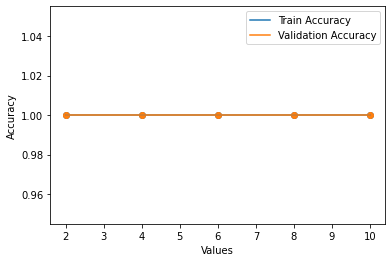

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train decision tree classifiers & Evaluate on validation set

min_samples_split = [2, 4, 6, 8, 10]
val_acc=[]
train_acc=[]
for sample in min_samples_split:
  dtc = DecisionTreeClassifier(min_samples_split=sample, max_depth = 20, random_state=2021)
  dtc.fit(x_train, y_train)

  pred = dtc.predict(x_val)
  val_score = accuracy_score(y_val, pred)
  val_acc.append(val_score)
  pred_t= dtc.predict(x_train)
  train_score = accuracy_score(y_train, pred_t)
  train_acc.append(train_score)
  print("For sample = %s, validation accuracy = %.5f%%" % (sample, val_score * 100))
  print("For sample = %s, train accuracy = %.5f%%" % (sample, train_score * 100))

# Plot errors

import matplotlib.pyplot as plt
plt.scatter(min_samples_split, train_acc)
plt.plot(min_samples_split, train_acc, label = "Train Accuracy")
plt.scatter(min_samples_split, val_acc)
plt.plot(min_samples_split, val_acc, label = "Validation Accuracy")
plt.xlabel('Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## 7) Test your CHOSEN classifier on Test set

- Apply same pre-processing as training data (probably none)
- Predict the labels of testing data **using the best chosen SINGLE model out of the models that you have tried from step 6 (you have selected your model according to your validation results)** and report the accuracy. 

In [ ]:
# You may want to train your BEST decision tree model on both training and validation sets. To merge these two, you may use
# concat() method of pandas

dtc = DecisionTreeClassifier(min_samples_split=min_samples_split[0], max_depth = 20, random_state=2021)
dtc.fit(x_train, y_train)


# test prediction using a decision tree with all default parameters and ..... min-split value
pred = dtc.predict(x_test)
test_score = accuracy_score(y_test, pred)



# Report your accuracy

print("For sample = %s, test accuracy = %.5f%%" % (min_samples_split[0], test_score * 100))


For sample = 2, test accuracy = 100.00000%


## 8) Bonus Section: Extract the rules

- Decision Tree is a rule-based algorithm and we can extract those rules and convert it to if else statements.
- Use scikit-learn documentation and find the way to extract the rules.

In [ ]:
# code here
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=3, random_state=12)
model = dt.fit(x, y)
rule = tree.export_text(dt)
print(rule)

|--- feature_5 <= 0.50
|   |--- class: 0.0
|--- feature_5 >  0.50
|   |--- class: 1.0



## 9) Notebook & Report 

**Notebook: We may just look at your notebook results; so make sure each cell is run and  outputs are on place.**

**Report: Write an at most 1/2 page summary of your approach to this problem at the end of your notebook**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what dec. trees or dataset details are, assuming they are known to people in your research area). 

**Must include statements such as:**

- **20pts** - The problem definition in 1-2 lines and explanation of the features (which is an ordinal variable? which is binary? etc.)

- **20pts** - What type of model is Decision Tree? (Unsupervised or supervised - explanation? Classification or regression - explanation?)

- **20pts** - Why do we have a seperate validation set?
 
- **20pts** - Give the validation accuracies for different hyperparameters **in a table** and state which one you selected
 
- **20pts** - State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the min sample split = .... , giving classification accuracy of …% on test data….""


The **last day for the submissions** is Monday, 1 August 2022, 12:00 AM. **Late submissions** are accepted until Wednesday, 3 August 2022, 12:00 AM with a **-10 pts penalty**.

*You will get full points from here as long as you have a good (enough) summary of your work, regardless of your best performance or what you have decided to talk about in the last few lines.*


## 10) Submission

Please submit your **"share link" INLINE in Sucourse submissions**. That is because we should be able to click on the link and go there and run (and possibly also modify) your code. 

For us to be able to modify, in case of errors etc, **you should get your "share link" as **share with anyone in edit mode** 

 **Also submit your notebook as pdf as attachment**, choose print and save as PDF, save with hw1-lastname-firstname.pdf to facilitate grading.

If you are working on your desktop, only share the pdf file of this notebook.

## Questions? 

You can and should ask all your Google Colab related questions under Forums  and feel free to answer/share your answer regarding Colab. 

You can also ask/answer about which functions to use and what libraries... 

However you should **not ask** about the core parts, that is what is validation/test, which one shd. have higher performance, what are your scores etc.


# **REPORT**

Our problem in this homework is predicting if a candidate look for another job or will work for the company. Our variable y, which is target is a binary variable, because it has two categories, 1 and 0, candidate will look for a new job or not. When we look at the other variables, relevant_experience is also binary variable, again it is yes or no. education_level is ordinal, because numbers indicates educatiın levels, which are realtive type of values. The other variable are belonged the real-valued variable type. 

Our decision tree is an example of supervised learning. Because we have features(input) and label(output). The machine is learning from the labeled data, for our problem it is 0 or 1 and then makes the predictions according to new examples. And it is also an example for classification, because its predict a class label not a real-value. 

We have a sperate validation set because, in validation data, hyper-parameters are fine-tuned with this data. We are utilizing to assess how well our model performs for various combinations of hyperparameter values, and we are maintaining the model that has been trained the best.



| **Hyperparameter** | **Validation Accuracy** |
|---------------------|:-----------------------|
|2 | 100.00000% |
|4 | 100.00000% |
|6 | 100.00000% |
|8 | 100.00000% |
|10 | 100.00000% |

From the table as we see, I found the 100% accuracy on both datasets. Thus, I choose the smallest min_sample_split model, which is 2. 

We have obtained the best results with the min sample split = 2, giving classification accuracy of 100% on test data. 
